Задача 1.8 Вычисление интегральной экспоненты

In [107]:
# подключение библиотек
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal, getcontext

# введение констант - в идеале вынести в отдельный файл

C = Decimal("0.577215664901533")


getcontext().prec = 15


In [108]:
# Функция для определения необходимого числа членов в разложении ряда для заданной точности deltaF

def counter(delta, x):
    k = 1
    x = Decimal(x)
    delta = Decimal(delta)
    curr = 1/delta
    if x <= 1:
        while ((k+1)**2)*Decimal(np.math.factorial(k)) < curr:
            k = k + 1
        return k
    # done just for E1. Need to modify for E2, E3 
    else:
        while ((k+1)**2)*Decimal(np.math.factorial(k)) / (x**(k + 1)) < curr:
            k = k + 1
        return k


# вычисление E_1 (x) с помощью суммы ряда

def exp_1_series(x, delta):
    if x ==0 :
        return ("error of using this function")
    k = counter(delta, x)
    n = k // 2
    sum = Decimal("0.0")
    x = Decimal(x)
    for i in range(1, n + 1):
        temp = (((-1)**k)*(x**k))/(k*Decimal(np.math.factorial(k))) + (((-1)**(k - 1))*(x**(k - 1)))/((k - 1)*Decimal(np.math.factorial(k - 1)))
        temp = Decimal(temp)
        sum = sum + temp
        k = k - 2
    if k == 1:
        sum = sum - x
    sum = sum - C - Decimal.ln(x)
    return sum

# вычисление E_2 (x) с помощью рекурсивной формулы

def exp_2_series(x, delta):
    # if x > 1 :
    #     return ("error of using this function")
    if x == 0 :
        return 1
    x = Decimal(x)
    sum = Decimal(np.exp((-1)*x) - x*exp_1_series(x, delta))
    return sum


# вычисление E_3 (x) с помощью рекурсивной формулы

def exp_3_series(x, delta):
    # if x > 1 :
    #     return ("error of using this function")
    if x == 0 :
        return 0.5
    x = Decimal(x)
    sum = Decimal((1 - x)*np.exp((-1)*x)  +  (x**2)*exp_1_series(x, delta))
    return sum


    

Машинное эпсилон : 3.5527136788005E-15


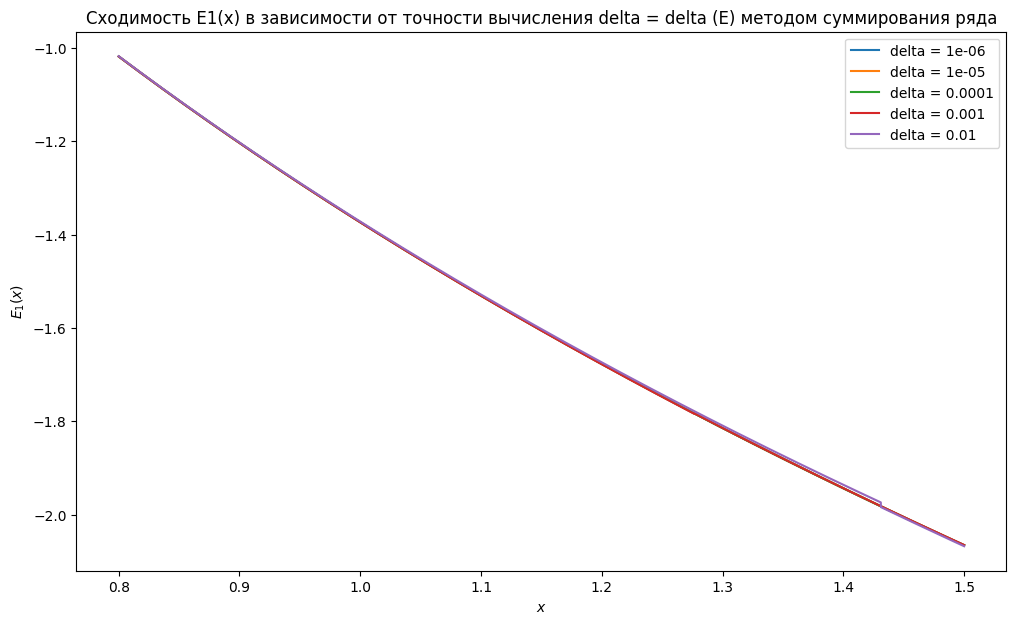

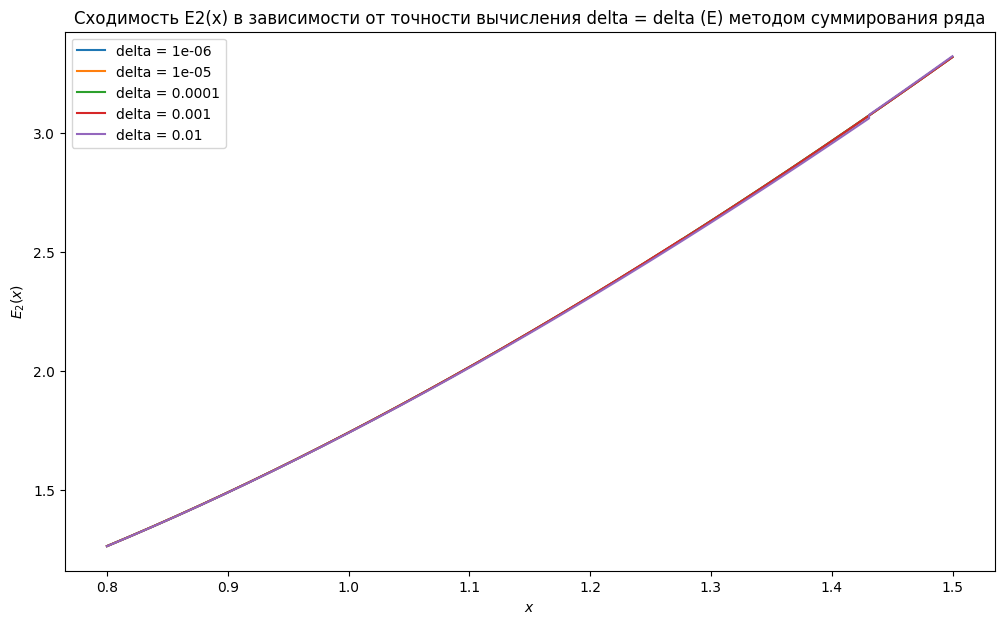

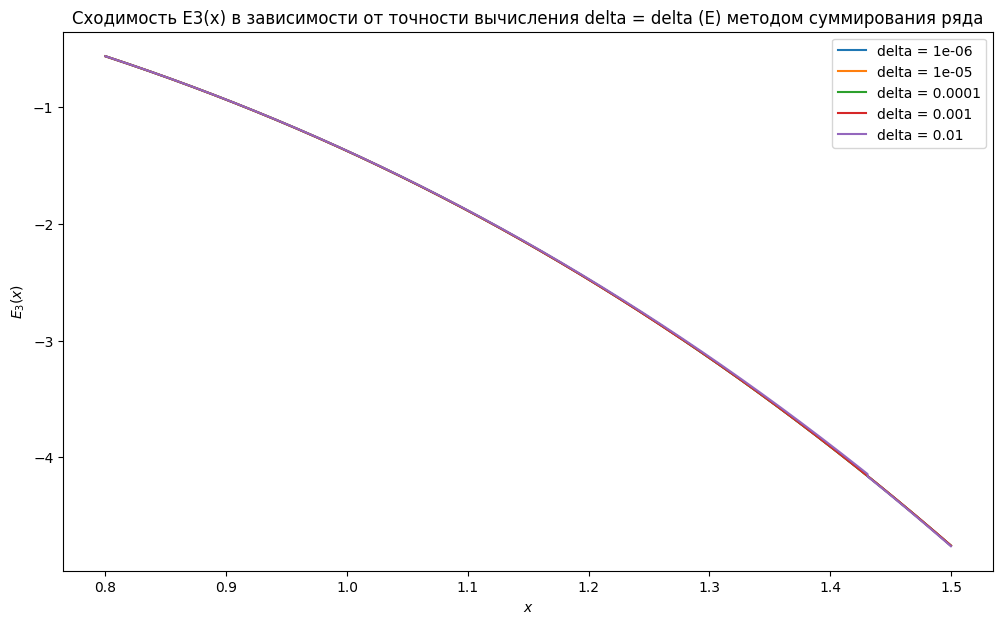

In [109]:
# вычисление машинного e

i = 0
epsDec = Decimal("1.0")
while (1 + epsDec) != 1:
        epsDec = epsDec / 2
        i += 1
print("Машинное эпсилон :", epsDec)

# тест первого метода

x = np.arange(0.80, 1.5, 0.0001)
delta = np.array([0.000001, 0.00001, 0.0001, 0.001, 0.01])

# E1(x)
y = np.zeros(len(x) * len(delta)).reshape(len(delta), len(x))

for i in range(len(delta)):
    for j in range(len(x)):
        y[i,j] = exp_1_series(x[j], delta[i])

plt.figure(figsize=[12,7])
for i in range (len(delta)):
    str_curr = 'delta = ' + str(delta[i])
    plt.plot(x, y[i], '-', label = str_curr)
plt.xlabel("$x$")
plt.ylabel("$E_1(x)$")
plt.title("Сходимость Е1(х) в зависимости от точности вычисления delta = delta (E) методом суммирования ряда")

plt.legend()
plt.show()

# E2(x)
for i in range(len(delta)):
    for j in range(len(x)):
        y[i,j] = exp_2_series(x[j], delta[i])

plt.figure(figsize=[12,7])
for i in range (len(delta)):
    str_curr = 'delta = ' + str(delta[i])
    plt.plot(x, y[i], '-', label = str_curr)
plt.xlabel("$x$")
plt.ylabel("$E_2(x)$")
plt.title("Сходимость Е2(х) в зависимости от точности вычисления delta = delta (E) методом суммирования ряда")

plt.legend()
plt.show()

# E3(x)
for i in range(len(delta)):
    for j in range(len(x)):
        y[i,j] = exp_3_series(x[j], delta[i])

plt.figure(figsize=[12,7])
for i in range (len(delta)):
    str_curr = 'delta = ' + str(delta[i])
    plt.plot(x, y[i], '-', label = str_curr)
plt.xlabel("$x$")
plt.ylabel("$E_3(x)$")
plt.title("Сходимость Е3(х) в зависимости от точности вычисления delta = delta (E) методом суммирования ряда")

plt.legend()
plt.show()

Построим график зависимости ln (delta E / E) для суммирования рядом (для Е1). 

Для этого модифицируем функцию расчета У1 с помощью рядов для подачи на вход не (x, delta), а (x, k)

In [110]:
# Функция вычисляет погрешность определения Е 
def delta_find(k, x):
    # delta = Decimal(k * epsDec)
    delta = Decimal("0.0")
    x = Decimal(x)
    if x < 1:
        delta = delta + 1/(((k)**2)*Decimal(np.math.factorial(k)))
    else:
        delta = delta + (x**(k))/(((k)**2)*Decimal(np.math.factorial(k)))
    return delta


def exp_1_series_count(x, k):
    if x == 0 :
        return ("error of using this function")
    n = k // 2
    sum = Decimal("0.0")
    x = Decimal(x)
    for i in range(1, n + 1):
        temp = (((-1)**k)*(x**k))/(k*Decimal(np.math.factorial(k))) + (((-1)**(k - 1))*(x**(k - 1)))/((k - 1)*Decimal(np.math.factorial(k - 1)))
        sum = sum + temp
        k = k - 2
    if k == 1:
        sum = sum - x
    sum = sum - C - Decimal.ln(x)
    return sum


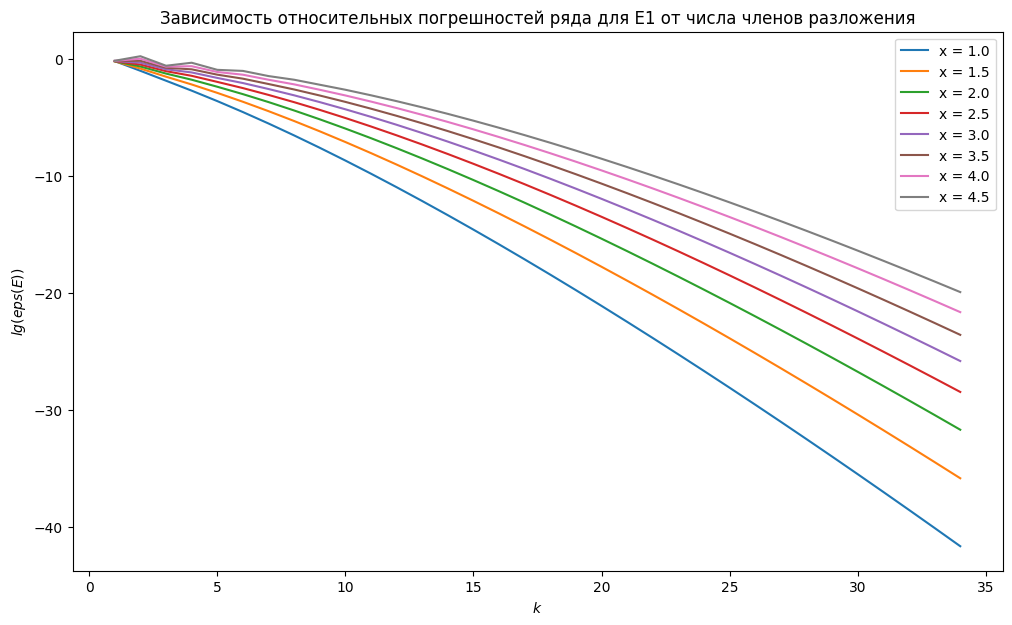

In [111]:
k = np.arange(1,35)
x = np.arange(1, 5, 0.5)

y = np.zeros(len(x) * len(k)).reshape(len(x), len(k))

for i in range(len(x)):
    for j in range(len(k)):
        temp_1 = abs(delta_find(k[j], x[i]))
        temp_2 = abs(exp_1_series_count(x[i], k[j]))
        y[i,j] = Decimal.log10(temp_1) - Decimal.log10(temp_2)

plt.figure(figsize=[12,7])
for i in range (len(x)):
    str_curr = 'x = ' + str(x[i])
    plt.plot(k, y[i], '-', label = str_curr)
plt.xlabel("$k$")
plt.ylabel("$lg(eps(E))$")
plt.title("Зависимость относительных погрешностей ряда для E1 от числа членов разложения")

plt.legend()
plt.show()

# возникает ошибка расчета, связанная с вычислением больших чисел в temp, нужно понять, что с этим сделать. Возможно, переделать на алгоритм Горнера


# Вычисление экспоненты цепной дробью

In [112]:
Count = 10

getcontext().prec = 100

# вычисление цепной дроби при аргументе х, порядке экспоненты n, и длине k

def exp_frac(x, n, k):
    x = Decimal(x)
    frac = Decimal((n + k)/((k + 1)/x + 1))
    for i in range(k - 1, -1, -1):
        frac = (n + i)/((i + 1)/(x + frac) + 1)
    frac = 1/(x + frac)
    return frac

# функция для вычисления интегральной экспоненты

def exponent_frac(x, n, k):
    inv_x = Decimal("-1.0")*Decimal(x)
    exp = Decimal(Decimal.exp(inv_x)*(exp_frac(x, n, k) + exp_frac(x, n, k - 1))/2)
    return exp

# функция вычисления погрешности метода для интегральной экспоненты

def delta_exponent(x, n, k):
    delta = Decimal((exp_frac(x, n, k) - exp_frac(x, n, k - 1)))
    return delta


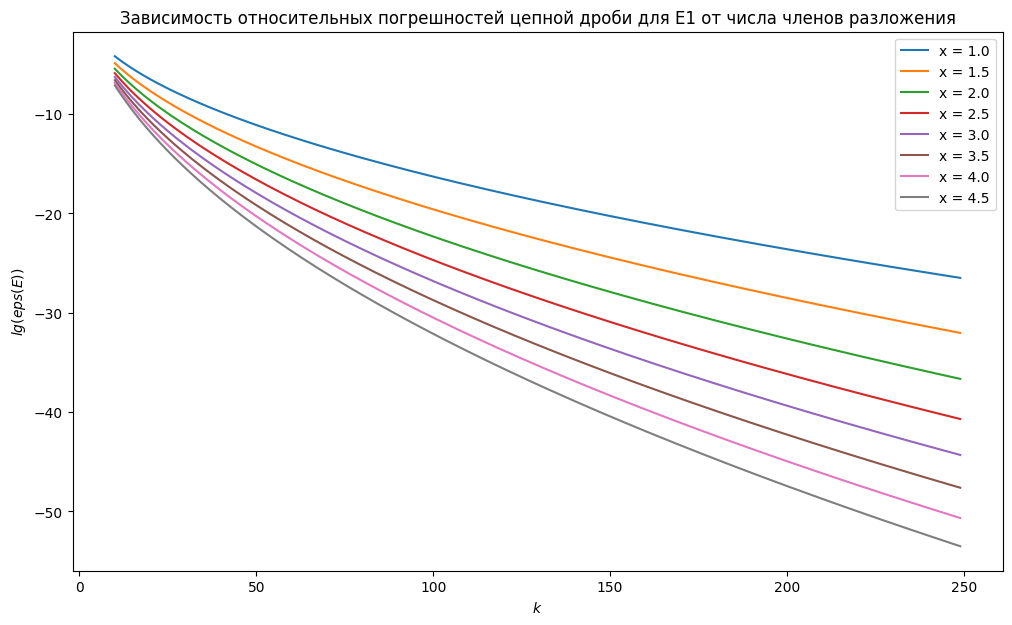

In [113]:
# оценка достаточного уровня цепной дроби

k = np.arange(10,250)
x = np.arange(1, 5, 0.5)

y = np.zeros(len(x) * len(k)).reshape(len(x), len(k))

for i in range(len(x)):
    for j in range(len(k)):
        temp_1 = abs(delta_exponent(x[i], 1, k[j]))
        temp_2 = abs(exponent_frac(x[i], 1, k[j]))
        y[i,j] = Decimal.log10(temp_1) - Decimal.log10(temp_2)

plt.figure(figsize=[12,7])
for i in range (len(x)):
    str_curr = 'x = ' + str(x[i])
    plt.plot(k, y[i], '-', label = str_curr)
plt.xlabel("$k$")
plt.ylabel("$lg(eps(E))$")
plt.title("Зависимость относительных погрешностей цепной дроби для E1 от числа членов разложения")

plt.legend()
plt.show()


In [114]:
# функция, вычисляющая нужное значение уровня цепной дроби при заданном delta f

def find_level(x, n, delta):
    k = 1
    delta = Decimal(delta)
    while abs(delta_exponent(x, n, k)) > delta:
        k = k + 1
    return k

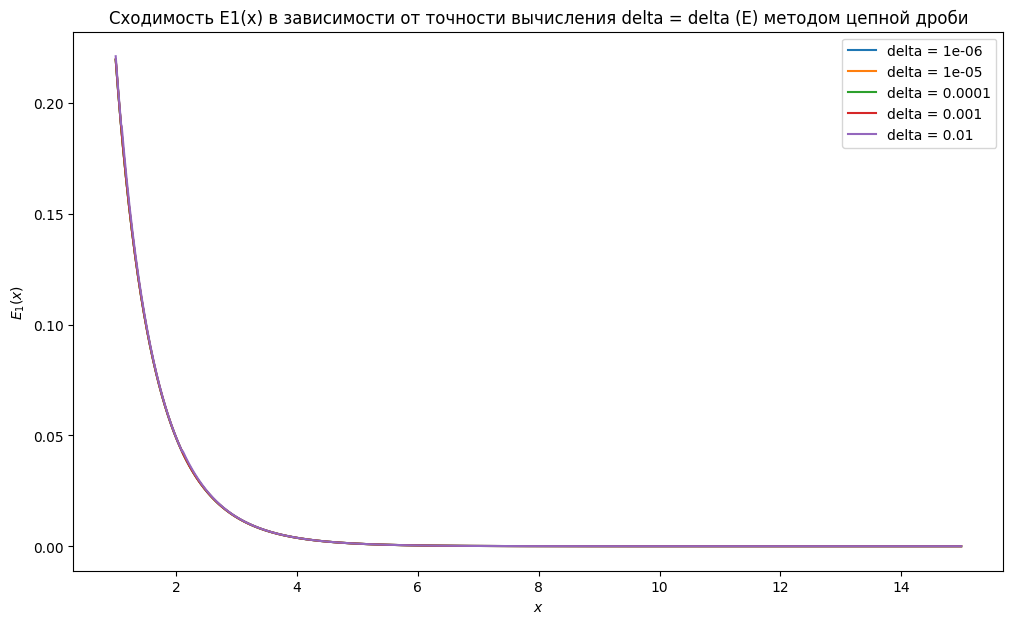

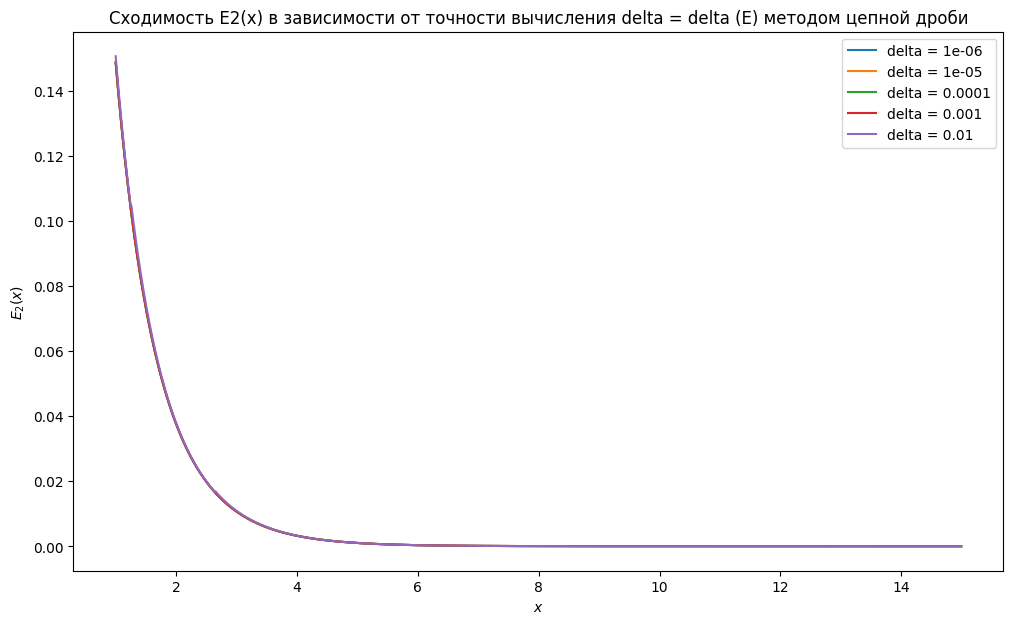

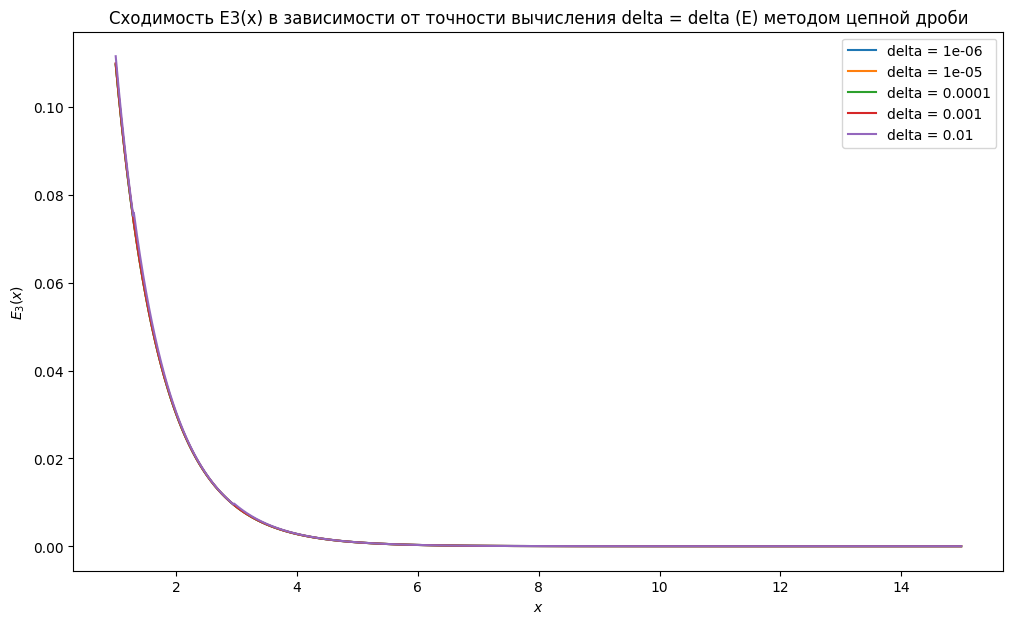

In [115]:
# проверка второго метода вычисления интегральной экспоненты

x = np.arange(1.0, 15, 0.01)
delta = np.array([0.000001, 0.00001, 0.0001, 0.001, 0.01])

# E1(x)
y = np.zeros(len(x) * len(delta)).reshape(len(delta), len(x))

for i in range(len(delta)):
    for j in range(len(x)):
        k = find_level(x[j], 1, delta[i])
        y[i,j] = exponent_frac(x[j], 1, k)

plt.figure(figsize=[12,7])
for i in range (len(delta)):
    str_curr = 'delta = ' + str(delta[i])
    plt.plot(x, y[i], '-', label = str_curr)
plt.xlabel("$x$")
plt.ylabel("$E_1(x)$")
plt.title("Сходимость Е1(х) в зависимости от точности вычисления delta = delta (E) методом цепной дроби")

plt.legend()
plt.show()

# E2(x)
for i in range(len(delta)):
    for j in range(len(x)):
        k = find_level(x[j], 2, delta[i])
        y[i,j] = exponent_frac(x[j], 2, k)

plt.figure(figsize=[12,7])
for i in range (len(delta)):
    str_curr = 'delta = ' + str(delta[i])
    plt.plot(x, y[i], '-', label = str_curr)
plt.xlabel("$x$")
plt.ylabel("$E_2(x)$")
plt.title("Сходимость Е2(х) в зависимости от точности вычисления delta = delta (E) методом цепной дроби")

plt.legend()
plt.show()

# E3(x)
for i in range(len(delta)):
    for j in range(len(x)):
        k = find_level(x[j], 3, delta[i])
        y[i,j] = exponent_frac(x[j], 3, k)
plt.figure(figsize=[12,7])
for i in range (len(delta)):
    str_curr = 'delta = ' + str(delta[i])
    plt.plot(x, y[i], '-', label = str_curr)
plt.xlabel("$x$")
plt.ylabel("$E_3(x)$")
plt.title("Сходимость Е3(х) в зависимости от точности вычисления delta = delta (E) методом цепной дроби")

plt.legend()
plt.show()

# Общее сравнение двух методов

In [116]:
print(epsDec)

3.5527136788005E-15


Для различных диапазонов значения х и погрешности метода, сравнимой с погрешностью машинного вычисления, вычислим E1(x)

In [ ]:
# delta E = 10^(-15)

# for series choose k = 20
k_series = 20
# for fractions choose k = 50
k_frac = 50


x_1 = np.arange(0.01, 1.0, 0.0001)
x_2 = np.arange(1.0, 15.0, 0.5)

y_1 = np.zeros(len(x_1))
y_2 = np.zeros(len(x_1))

for i in range(len(x_1)):
    y_1[i] = exp_1_series_count()